In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import visuals as vs
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [41]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

In [42]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


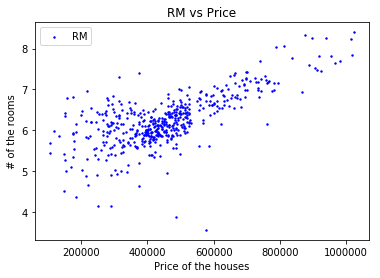

In [43]:
plt.scatter(prices, features.iloc[:, 0], color='blue', s = 2)
plt.title('RM vs Price')
plt.legend()
plt.xlabel('Price of the houses')
plt.ylabel('# of the rooms')
plt.show()


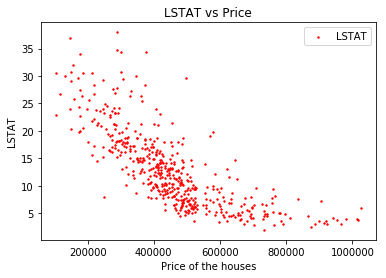

In [44]:
plt.scatter(prices, features.iloc[:, 1], color='red', s = 2)
plt.title('LSTAT vs Price')
plt.legend()
plt.xlabel('Price of the houses')
plt.ylabel('LSTAT')
plt.show()

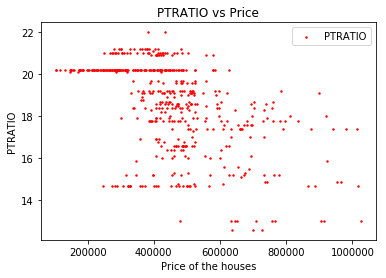

In [45]:
plt.scatter(prices, features.iloc[:, 2], color='red', s = 2)
plt.title('PTRATIO vs Price')
plt.legend()
plt.xlabel('Price of the houses')
plt.ylabel('PTRATIO')
plt.show()

In [46]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    return score

In [83]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 26)
print("Training and testing split was successful.")

Training and testing split was successful.


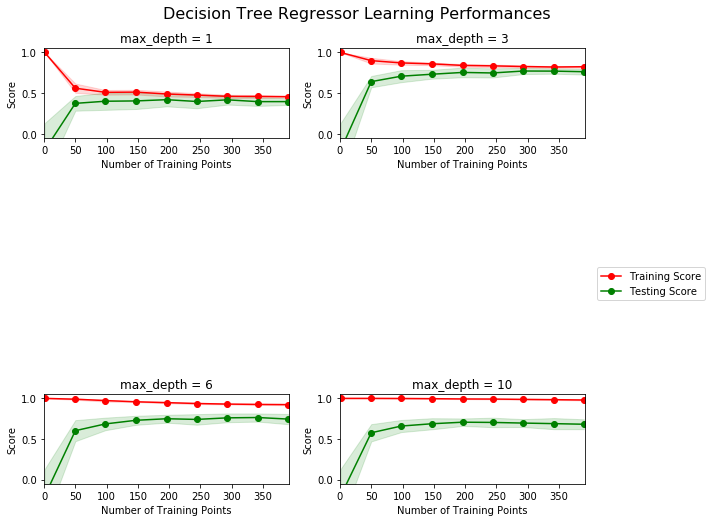

In [84]:
vs.ModelLearning(features, prices)

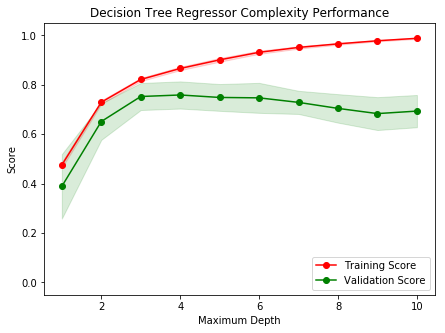

In [85]:
vs.ModelComplexity(X_train, y_train)

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    cv_sets.get_n_splits(X.shape[0])
    regressor = DecisionTreeRegressor()
    params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

In [87]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [88]:
reg = fit_model(X_train, y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [89]:
client_data = [[5, 17, 15], 
               [4, 32, 22],
               [8, 3, 12]]
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,375.00
Predicted selling price for Client 2's home: $231,980.00
Predicted selling price for Client 3's home: $868,612.50


In [93]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39
